In [2]:
#Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [9]:
#Loading Data
wine_data = pd.read_csv('/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv')

In [10]:
#First 5 rows and columns
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [11]:
#Number of Rows and Columns
wine_data.shape

(1599, 12)

In [12]:
#Checking missing values
wine_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Data Analysis and Visualization

In [13]:
#Some Numeric Analaysis 
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [15]:
#How many values in Quality column
wine_data["quality"].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

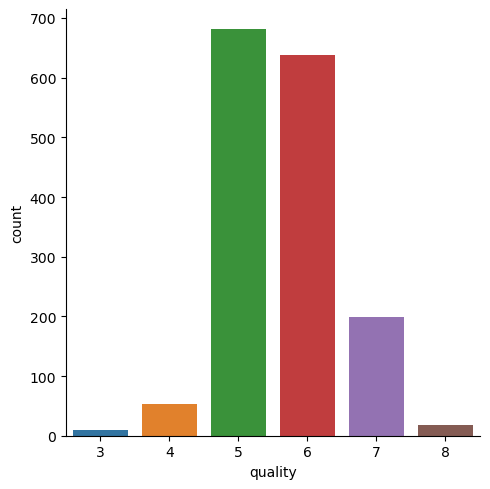

In [16]:
# Number of values for each quality
sns.catplot(x="quality",data=wine_data,kind="count")

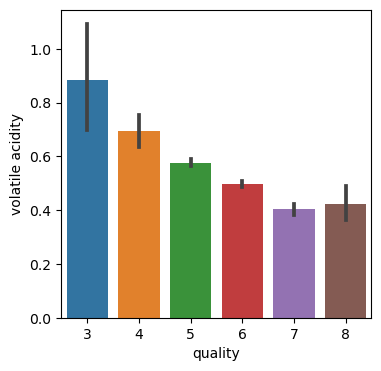

In [21]:
# Volatile Acidity vs Quality
plt.figure(figsize=(4,4))
sns.barplot(x="quality",y="volatile acidity",data=wine_data)
plt.show()

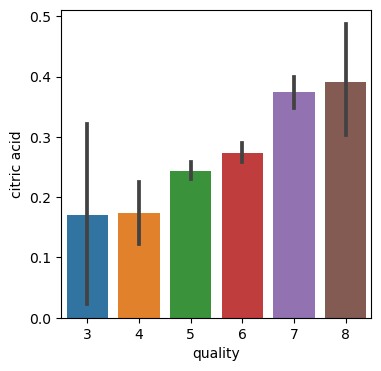

In [24]:
#Citric Asid vs Quality
plt.figure(figsize=(4,4))
sns.barplot(x="quality",y="citric acid",data=wine_data)
plt.show()

In [25]:
#Correlation
corr=wine_data.corr()

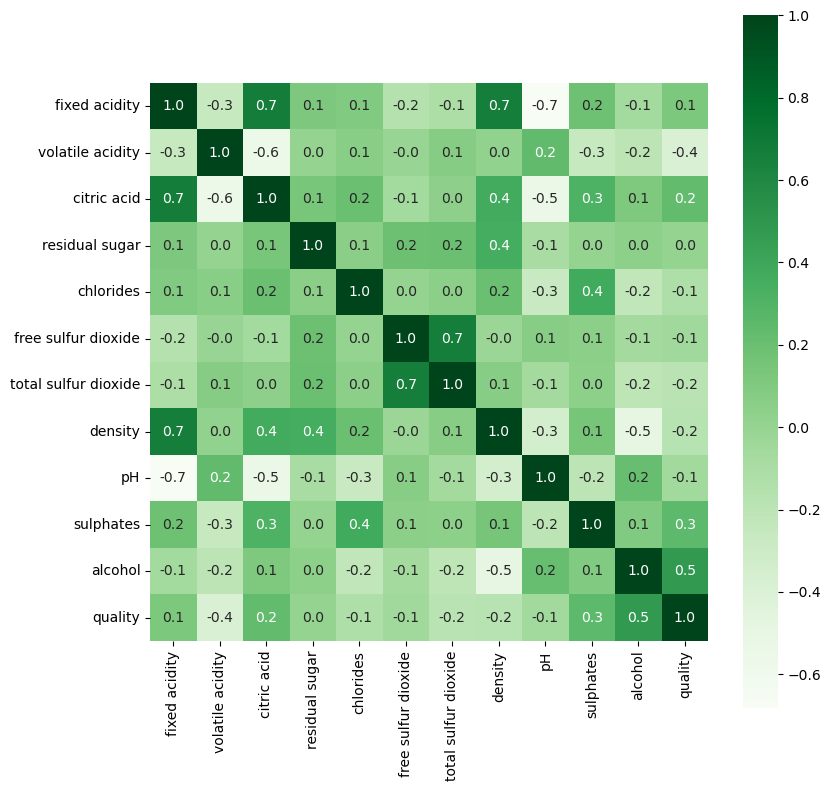

In [27]:
#Heatmap
plt.figure(figsize=(9,9))
sns.heatmap(corr,annot=True,fmt=".1f",square=True,cbar=True,cmap="Greens")
plt.show()

In [29]:
#Seperate data and Label
X=wine_data.drop(columns="quality",axis=1)

In [30]:
print(X)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [34]:
#Label Binarization 1 or 2
Y=wine_data["quality"].apply(lambda y_value:1 if y_value>=7 else 0)

In [35]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


In [36]:
#Train Test Split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [37]:
print(Y.shape, Y_train.shape, Y_test.shape)

(1599,) (1279,) (320,)


Model Training

In [38]:
#Random Forest Classifier
model=RandomForestClassifier()

In [39]:
model.fit(X_train,Y_train)

RandomForestClassifier()

In [41]:
#Accuracy Score on Train Data
train_predict=model.predict(X_train)
train_score=accuracy_score(train_predict,Y_train)
print("Accuracy score on the training data: ",train_score)

Accuracy score on the training data:  1.0


In [42]:
#Accuracy Score on Test Data
test_predict=model.predict(X_test)
test_score=accuracy_score(test_predict,Y_test)
print("Accuracy score on the test data: ",test_score)

Accuracy score on the test data:  0.934375


In [44]:
#Building a Predictive System
input_data=np.array([7.5,0.5,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.8,10.5])

#Reshape array
input=input_data.reshape(1,-1)

prediction=model.predict(input)
print(prediction)

if (prediction[0]==1):
  print('Good Quality Wine')
else:
  print('Bad Quality Wine')

[0]
Bad Quality Wine


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
